<h1>Unsupervised Learning</h1>

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [390]:
# load the data
df = pd.read_csv("../data/heart_disease_selected.csv")
df.head()
# separate features and target
X = df.drop("target", axis=1)
y = df["target"]
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3>K-Means Clustering with Elbow Method</h3>

c:\Users\Mohab Hamdy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Mohab Hamdy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Mohab Hamdy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Mohab Hamdy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

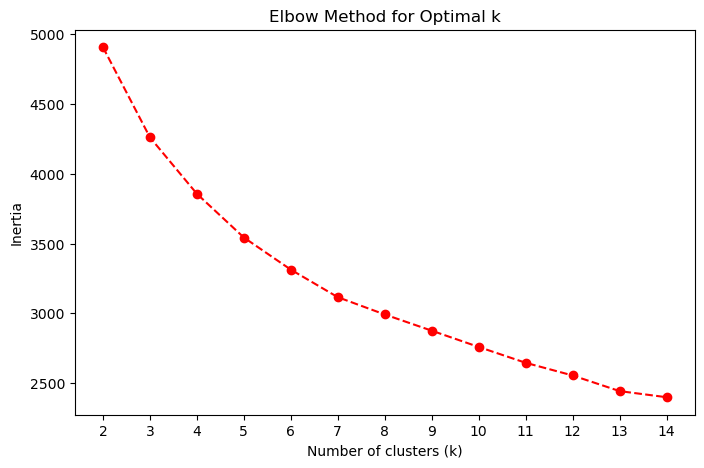

In [391]:
# Elbow method
inertia = []
k_values = range(2, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42 , n_init=15)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o' , color='r' , linestyle='--')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.show()

In [392]:
# choose k=3 based on elbow
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42 , n_init=15)
df['KMeans_cluster'] = kmeans.fit_predict(X_scaled)
df.head()

c:\Users\Mohab Hamdy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,chol,thalach,age,cp_4.0,oldpeak,exang,trestbps,target,KMeans_cluster
0,0.303643,0.489727,1.007386,0,1.368109,0.0,0.705176,0,1
1,0.789967,-1.181478,1.432034,1,0.611589,1.0,1.518569,1,2
2,0.266939,-0.345875,1.432034,1,1.651804,1.0,-0.650479,1,2
3,0.459634,1.961979,-1.752828,0,2.502889,0.0,-0.108217,0,1
4,0.037541,1.365120,-1.328180,0,0.517024,0.0,-0.108217,0,1


<h3>Hierarchical Clustering with Dendrogram</h3>

In [393]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

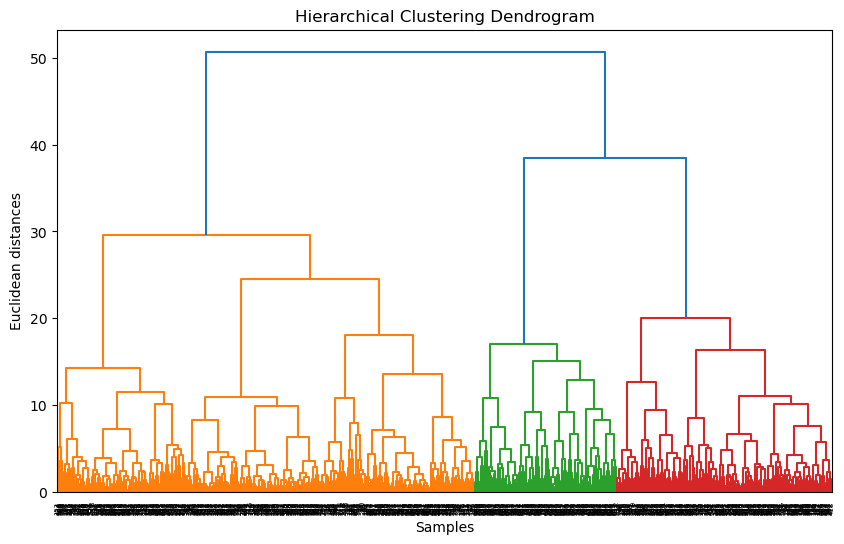

In [394]:
# dendrogram
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

In [395]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['HC_cluster'] = hc.fit_predict(X_scaled)
df.head()

,chol,thalach,age,cp_4.0,oldpeak,exang,trestbps,target,KMeans_cluster,HC_cluster
0,0.303643,0.489727,1.007386,0,1.368109,0.0,0.705176,0,1,0
1,0.789967,-1.181478,1.432034,1,0.611589,1.0,1.518569,1,2,1
2,0.266939,-0.345875,1.432034,1,1.651804,1.0,-0.650479,1,2,1
3,0.459634,1.961979,-1.752828,0,2.502889,0.0,-0.108217,0,1,0
4,0.037541,1.365120,-1.328180,0,0.517024,0.0,-0.108217,0,1,0


<h3>Compare Clusters with Actual Labels</h3>

In [396]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score , silhouette_score

In [397]:
# for KMeans with k=4
adjusted_rand_score(y, df['KMeans_cluster'])
silhouette_score(X_scaled, df['KMeans_cluster'])
confusion_matrix(y, df['KMeans_cluster'])

# for Hierarchical Clustering with k=3
adjusted_rand_score(y, df['HC_cluster'])
silhouette_score(X_scaled, df['HC_cluster'])
confusion_matrix(y, df['HC_cluster'])

evaluation = pd.DataFrame({
    "Model": ["KMeans (k=4)", "Hierarchical Clustering (k=3)"],
    "Adjusted Rand Index": [    adjusted_rand_score(y, df['KMeans_cluster']),
        adjusted_rand_score(y, df['HC_cluster'])],
    "Silhouette Score": [silhouette_score(X_scaled, df['KMeans_cluster']),
        silhouette_score(X_scaled, df['HC_cluster'])],
    "Confusion Matrix": [confusion_matrix(y, df['KMeans_cluster']),
        confusion_matrix(y, df['HC_cluster'])]
})
evaluation


,Model,Adjusted Rand Index,Silhouette Score,Confusion Matrix
0,KMeans (k=4),0.227732,0.245297,"[[39, 331, 41], [169, 111, 229], [0, 0, 0]]"
1,Hierarchical Clustering (k=3),0.170659,0.238488,"[[342, 49, 20], [154, 207, 148], [0, 0, 0]]"
